## Steps to Download the Dataset from Kaggle
For more details, please read this -
https://www.kaggle.com/general/74235

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10268        306  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1497         47  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6485        146  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [6]:
!kaggle datasets download misrakahmed/vegetable-image-dataset/

100% 534M/534M [00:30<00:00, 21.0MB/s]
100% 534M/534M [00:30<00:00, 18.2MB/s]


In [7]:
!mkdir data
!unzip vegetable-image-dataset.zip -d data > /dev/null
!rm vegetable-image-dataset.zip

## Importing the Necessary Packages

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
from tensorflow.keras.preprocessing.image import load_img 

## EDA for Images Data

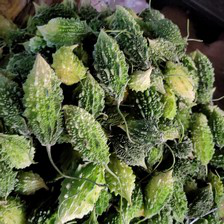

In [10]:
path = '/content/data/Vegetable Images/train/Bitter_Gourd'
name = '0002.jpg'
fullname = path + '/' + name
load_img(fullname)

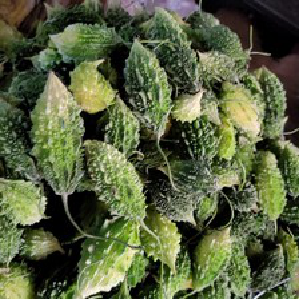

In [11]:
load_img(fullname, target_size=(299, 299))


Pre-Trained Neural Network

Let's apply a pre-trained neural network with imagenet classes.

We'll use Xception, but any other architecture will work as well.

Check here for a list of available models:

    https://keras.io/api/applications/
    https://www.tensorflow.org/api_docs/python/tf/keras/applications

We'll need to import 3 things:

    the model itself (Xception)
    the preprocess_input function that takes an image and prepares it
    the decode_predictions that converts the predictions of the model into human-readable classes



In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [13]:
# Let's load the model. The pre-trained model expects 299x299 input
model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3)
)

91884032/91884032 [==============================] - 5s 0us/step


In [14]:
# 

# Next,

    # we load the image using the load_img function
    # convert it to a numpy array
    # make it a batch of one example


img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [15]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [16]:
X = preprocess_input(X)

In [17]:
pred = model.predict(X)

1/1 [==============================] - 7s 7s/step


In [18]:
pred.shape

(1, 1000)

In [19]:
pred[0, :10]

array([9.8106306e-05, 1.4875518e-04, 3.6747224e-05, 5.6396413e-05,
       6.1375795e-05, 8.2675106e-05, 3.1706470e-05, 7.7174787e-05,
       1.4168506e-04, 1.2361309e-04], dtype=float32)

In [20]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n07714571', 'head_cabbage', 0.29033932),
  ('n07714990', 'broccoli', 0.18031602),
  ('n07715103', 'cauliflower', 0.14099078),
  ('n03991062', 'pot', 0.061629564),
  ('n13052670', 'hen-of-the-woods', 0.0561709)]]


### Transfer learning

- Instead of loading each image one-by-one, we can use a data generator. Keras will use it for loading the images and pre-processing them


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_size = (150, 150)
batch_size = 32


In [23]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "/content/data/Vegetable Images/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 15000 images belonging to 15 classes.


In [24]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "/content/data/Vegetable Images/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3000 images belonging to 15 classes.




For fine-tuning, we'll use Xception with small images (150x150)


In [25]:
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

base_model.trainable = False

83683744/83683744 [==============================] - 5s 0us/step


In [26]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(15)(vector)

model = keras.Model(inputs, outputs)

In [27]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [28]:
history = model.fit(train_ds, epochs=7, validation_data=val_ds)

Epoch 1/7
469/469 [==============================] - 46s 91ms/step - loss: 0.1983 - accuracy: 0.9533 - val_loss: 0.2131 - val_accuracy: 0.9643
Epoch 2/7
469/469 [==============================] - 40s 86ms/step - loss: 0.0827 - accuracy: 0.9807 - val_loss: 0.1268 - val_accuracy: 0.9807
Epoch 3/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0496 - accuracy: 0.9901 - val_loss: 0.0981 - val_accuracy: 0.9887
Epoch 4/7
469/469 [==============================] - 44s 94ms/step - loss: 0.0378 - accuracy: 0.9919 - val_loss: 0.1412 - val_accuracy: 0.9850
Epoch 5/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0599 - accuracy: 0.9911 - val_loss: 0.1456 - val_accuracy: 0.9853
Epoch 6/7
469/469 [==============================] - 41s 87ms/step - loss: 0.0449 - accuracy: 0.9937 - val_loss: 0.1492 - val_accuracy: 0.9853
Epoch 7/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0371 - accuracy: 0.9941 - val_loss: 0.0679 - val_accuracy: 0.9920

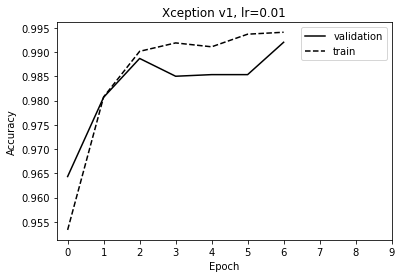

In [29]:
# Code to plot the training accuraacy and validation accuracy
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('xception_v1_0_01.svg')

plt.show()


In [30]:
# To make it easier for us, let's make a function for defining our model:
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(15)(vector)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [31]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()


0.0001
Epoch 1/10
469/469 [==============================] - 44s 89ms/step - loss: 0.9190 - accuracy: 0.7938 - val_loss: 0.3546 - val_accuracy: 0.9370
Epoch 2/10
469/469 [==============================] - 40s 85ms/step - loss: 0.2604 - accuracy: 0.9521 - val_loss: 0.1983 - val_accuracy: 0.9617
Epoch 3/10
469/469 [==============================] - 44s 95ms/step - loss: 0.1607 - accuracy: 0.9689 - val_loss: 0.1401 - val_accuracy: 0.9737
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.1152 - accuracy: 0.9785 - val_loss: 0.1111 - val_accuracy: 0.9777
Epoch 5/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0888 - accuracy: 0.9851 - val_loss: 0.0893 - val_accuracy: 0.9823
Epoch 6/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0710 - accuracy: 0.9883 - val_loss: 0.0749 - val_accuracy: 0.9833
Epoch 7/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0584 - accuracy: 0.9907 - val_loss: 0.0651 - val_ac

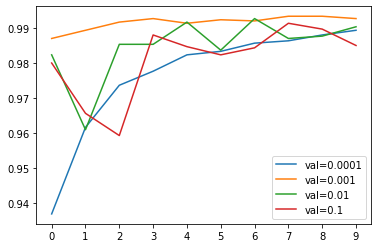

In [32]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [33]:
learning_rate = 0.001

### Checkpointing

    - Saving the best model only
    - Training a model with callbacks


In [34]:
model.save_weights('model_v1.h5', save_format='h5')

In [35]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [36]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
469/469 [==============================] - 48s 93ms/step - loss: 0.1957 - accuracy: 0.9525 - val_loss: 0.0609 - val_accuracy: 0.9853
Epoch 2/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0341 - accuracy: 0.9944 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 3/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0178 - accuracy: 0.9974 - val_loss: 0.0310 - val_accuracy: 0.9903
Epoch 4/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0102 - accuracy: 0.9987 - val_loss: 0.0273 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0067 - accuracy: 0.9995 - val_loss: 0.0228 - val_accuracy: 0.9930
Epoch 6/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.0192 - val_accuracy: 0.9933
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy:

### Adding more layers

 Adding one inner dense layer
 Experimenting with different sizes of inner layer


In [39]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(15)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
469/469 [==============================] - 43s 88ms/step - loss: 0.6061 - accuracy: 0.8184 - val_loss: 0.1512 - val_accuracy: 0.9633
Epoch 2/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1036 - accuracy: 0.9755 - val_loss: 0.0880 - val_accuracy: 0.9787
Epoch 3/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0597 - accuracy: 0.9873 - val_loss: 0.0723 - val_accuracy: 0.9817
Epoch 4/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0394 - accuracy: 0.9920 - val_loss: 0.0512 - val_accuracy: 0.9870
Epoch 5/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0265 - accuracy: 0.9955 - val_loss: 0.0469 - val_accuracy: 0.9873
Epoch 6/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0199 - accuracy: 0.9967 - val_loss: 0.0673 - val_accuracy: 0.9847
Epoch 7/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0143 - accuracy: 0.9979 - val_loss: 0.0429 - val_accura

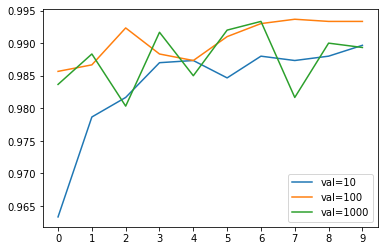

In [42]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

 ### Regularization and dropout

  - Regularizing by freezing a part of the network
  - Adding dropout to our model
  - Experimenting with different values


In [45]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(15)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [46]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=11, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


0.0
Epoch 1/11
469/469 [==============================] - 44s 88ms/step - loss: 0.1517 - accuracy: 0.9550 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 2/11
469/469 [==============================] - 41s 88ms/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 3/11
469/469 [==============================] - 41s 87ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0278 - val_accuracy: 0.9913
Epoch 4/11
469/469 [==============================] - 40s 85ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 5/11
469/469 [==============================] - 40s 85ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0480 - val_accuracy: 0.9860
Epoch 6/11
469/469 [==============================] - 39s 84ms/step - loss: 0.0165 - accuracy: 0.9943 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 7/11
469/469 [==============================] - 40s 84ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0349 - val_accur

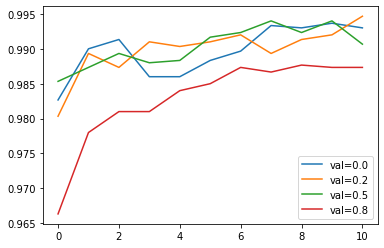

In [48]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

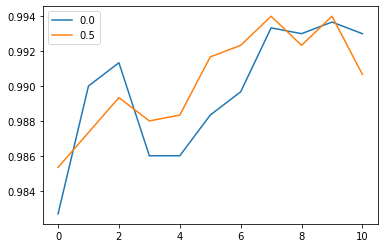

In [50]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

### Data augmentation

  - Different data augmentations
  - Training a model with augmentations
  - How to select data augmentations?


In [51]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '/content/data/Vegetable Images/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/data/Vegetable Images/train',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 15000 images belonging to 15 classes.
Found 15000 images belonging to 15 classes.


In [52]:
learning_rate = 0.001
size = 100
droprate = 0.0

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
469/469 [==============================] - 69s 142ms/step - loss: 0.1389 - accuracy: 0.9603 - val_loss: 0.0266 - val_accuracy: 0.9915
Epoch 2/10
469/469 [==============================] - 65s 139ms/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 3/10
469/469 [==============================] - 65s 139ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0120 - val_accuracy: 0.9966
Epoch 4/10
469/469 [==============================] - 65s 138ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 5/10
469/469 [==============================] - 64s 138ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0182 - val_accuracy: 0.9937
Epoch 6/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0087 - val_accuracy: 0.9977
Epoch 7/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0078 - val_ac

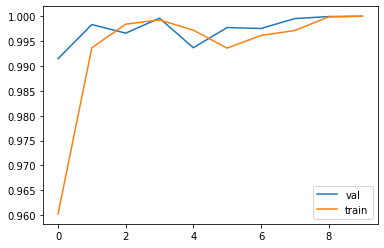

In [53]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training a larger model

    - Train a 299x299 model


In [59]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(15)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [60]:
input_size = 299

In [61]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    '/content/data/Vegetable Images/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    '/content/data/Vegetable Images/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [62]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [63]:
learning_rate = 0.001
size = 100
droprate = 0.0

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=12, validation_data=val_ds,
                   callbacks=[checkpoint])


Epoch 1/12
469/469 [==============================] - 362s 765ms/step - loss: 0.1351 - accuracy: 0.9711 - val_loss: 0.0268 - val_accuracy: 0.9930
Epoch 2/12
469/469 [==============================] - 355s 757ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.0145 - val_accuracy: 0.9957
Epoch 3/12
469/469 [==============================] - 354s 754ms/step - loss: 0.0115 - accuracy: 0.9971 - val_loss: 0.0313 - val_accuracy: 0.9890
Epoch 4/12
469/469 [==============================] - 353s 752ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0155 - val_accuracy: 0.9953
Epoch 5/12
469/469 [==============================] - 360s 768ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0235 - val_accuracy: 0.9953
Epoch 6/12
469/469 [==============================] - 359s 765ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0085 - val_accuracy: 0.9977
Epoch 7/12
469/469 [==============================] - 353s 753ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0152 -

### Using the model

- Loading the model
- Evaluating the model
- Getting predictions


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '/content/data/Vegetable Images/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 3000 images belonging to 15 classes.


In [5]:
model = keras.models.load_model('/content/xception_v4_1_10_0.998.h5')

In [6]:
model.evaluate(test_ds)

94/94 [==============================] - 27s 241ms/step - loss: 0.0078 - accuracy: 0.9990


[0.007776246871799231, 0.9990000128746033]

In [7]:
path = '/content/data/Vegetable Images/test/Cabbage/0957.jpg'

In [8]:
img = load_img(path, target_size=(299, 299))

In [9]:
import numpy as np

In [10]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [18]:
classes_test = test_ds.class_indices
classes_test

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [19]:
classes = [
    'Bean',
    'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [20]:
dict(zip(classes, pred[0]))

{'Bean': 1.0043294,
 'Bitter_Gourd': 0.375912,
 'Bottle_Gourd': -0.12768576,
 'Brinjal': 2.8724408,
 'Broccoli': -3.0634966,
 'Cabbage': 18.499323,
 'Capsicum': -6.165479,
 'Carrot': -9.247477,
 'Cauliflower': -2.0360203,
 'Cucumber': -5.542027,
 'Papaya': -4.9340296,
 'Potato': -6.9626093,
 'Pumpkin': -0.83061767,
 'Radish': -4.2551823,
 'Tomato': -1.853196}